# Assignment 3.2 - Support Vector Machines (SVM)

Please submit your solution of this notebook in the Whiteboard at the corresponding Assignment entry as .ipynb-file and as .pdf. <br><br>
Please do **NOT** rename the file!

#### State both names of your group members here:
[Jane and John Doe]

In [1]:
# Daniel Thompson and Paola Gega

---

## Grading Info/Details - Assignment 3.2:

The assignment will be graded semi-automatically, which means that your code will be tested against a set of predefined test cases and qualitatively assessed by a human. This will speed up the grading process for us.

* For passing the test scripts: 
    - Please make sure to **NOT** alter predefined class or function names, as this would lead to failing of the test scripts.
    - Please do **NOT** rename the files before uploading to the Whiteboard!

* **(RESULT)** tags indicate checkpoints that will be specifically assessed by a human.

* You will pass the assignment if you pass the majority of test cases and we can at least confirm effort regarding the **(RESULT)**-tagged checkpoints per task.

---

## Task 3.2.1 - SVM

Implement a Support Vector Machine (SVM) classifier from scratch using Stochastic Gradient Descent (SGD) algorithm for training.

* Implement the `SVM` class below. It should hold logic for an SVM classifier using the Hinge loss. **(RESULT)**
* Feel free to test is using synthetic data first (i.e. `make_blobs` and `make_moons` for linearly separable and non-separable tasks). 
* Finally, run your final SVM implementation of the [Wine Dataset](https://archive.ics.uci.edu/dataset/109/wine) dataset. You may use sklearns functions to load the dataset. **(RESULT)** <br> `from sklearn.datasets import load_wine` 

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
class SVM:
    """
    Support Vector Machine classifier implemented from scratch using NumPy.
    Uses gradient descent to optimize the hinge loss with L2 regularization.
    """
    
    def __init__(self, learning_rate=0.01, n_iterations=1000, regularization_param=0.01,
                  convergence_tol=1e-4, silent=False, bias=True):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.regularization_param = regularization_param
        self.convergence_tol = convergence_tol
        self.silent = silent
        self.bias = bias
        self.weights = None
        self.loss_history = []
        
        
    def fit(self, X, y):
        """
        Fit the SVM model to the training data.
        
        Parameters:
        X : np.ndarray
            Training feature data of shape (n_samples, n_features).
        y : np.ndarray
            Training labels of shape (n_samples,). Labels should be -1 or 1.
        """
        n_samples, n_features = X.shape
        
        # Initialize weights
        if self.bias:
            self.weights = np.zeros(n_features + 1)  # +1 for bias term
            X = np.column_stack((np.ones((n_samples, 1)), X))  # Add bias term to features
        else:
            self.weights = np.zeros(n_features)
        
        for iteration in range(self.n_iterations):
            margins = y * (X @ self.weights)
            # Compute hinge loss
            loss = ( np.mean(np.maximum(0, 1 - margins)) + (self.regularization_param / 2) 
                    * np.sum(self.weights[1:] ** 2) )
            self.loss_history.append(loss)
            
            if not self.silent and iteration % 100 == 0:
                print(f"Iteration {iteration}, Loss: {loss}")
            
            # Compute gradient.  We must use an indicator function as hinge loss is not defined piecewise.
            indicator = (margins < 1).astype(float)
            gradient = ( -np.mean((indicator * y)[:, np.newaxis] * X, axis=0) 
                        + self.regularization_param * np.r_[0, self.weights[1:]] )
            
            # Update weights
            self.weights -= self.learning_rate * gradient
            
            # Check for convergence
            if iteration > 0 and abs(self.loss_history[-2] - loss) < self.convergence_tol:
                if not self.silent:
                    print(f"Converged at iteration {iteration}.")
                break
        
    
    def predict(self, X):
        """
        Predict labels for the input data.
        
        Parameters:
        X : np.ndarray
            Input feature data of shape (n_samples, n_features).
        
        Returns:
        np.ndarray
            Predicted labels of shape (n_samples,). Labels are -1 or 1.
        """
        n_samples = X.shape[0]
        if self.bias:
            X = np.column_stack((np.ones((n_samples, 1)), X))  # Add bias term to features
        predictions = X @ self.weights
        return np.where(predictions >= 0, 1, -1)
        

In [4]:
from sklearn.datasets import make_blobs, make_moons
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_wine

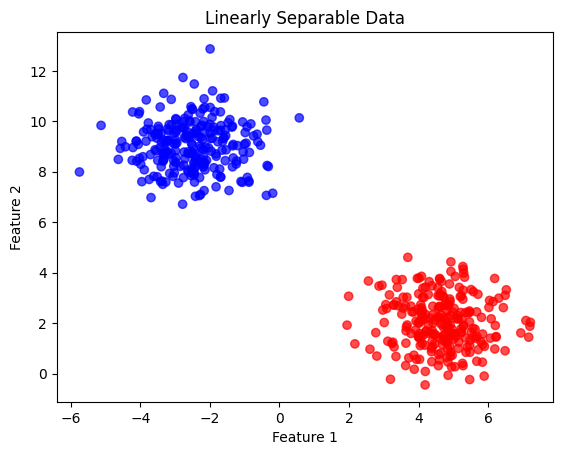

Iteration 0, Loss: 1.0
Converged at iteration 59.


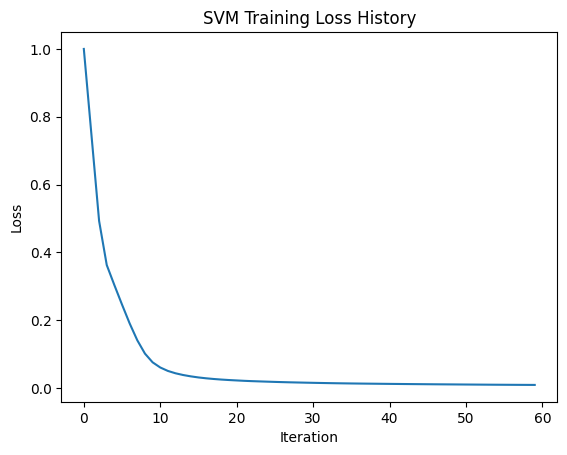

Test Accuracy on linearly separable data: 100.00%


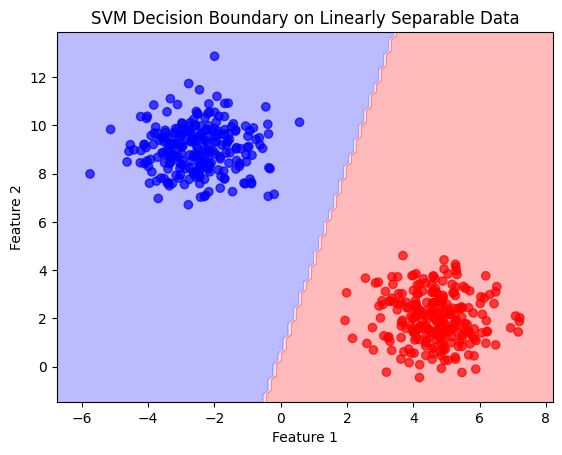

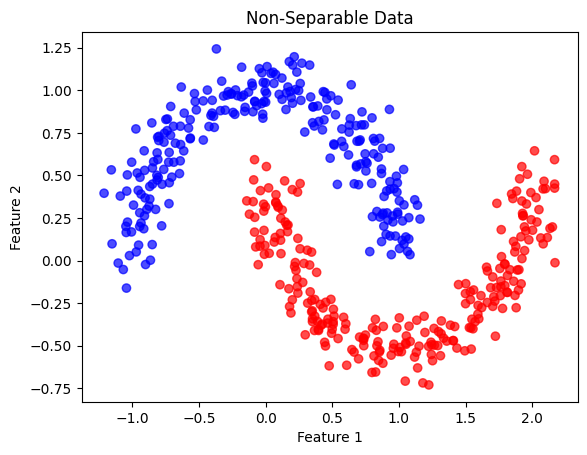

Iteration 0, Loss: 1.0
Iteration 100, Loss: 0.6119800120364095
Iteration 200, Loss: 0.4271780806668606
Iteration 300, Loss: 0.3899962765892023
Iteration 400, Loss: 0.373563277339915
Iteration 500, Loss: 0.3615541532473645
Converged at iteration 555.


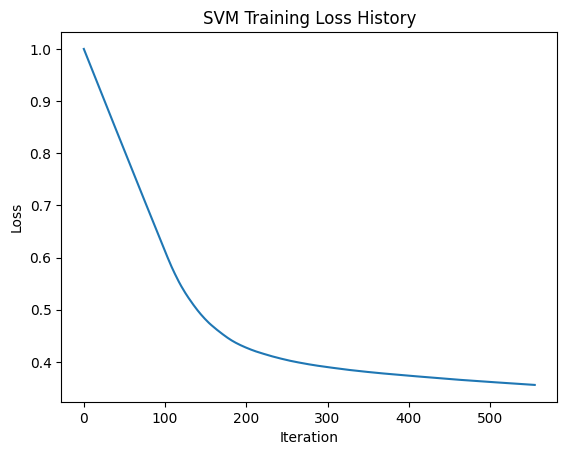

Test Accuracy on non-separable data: 85.00%


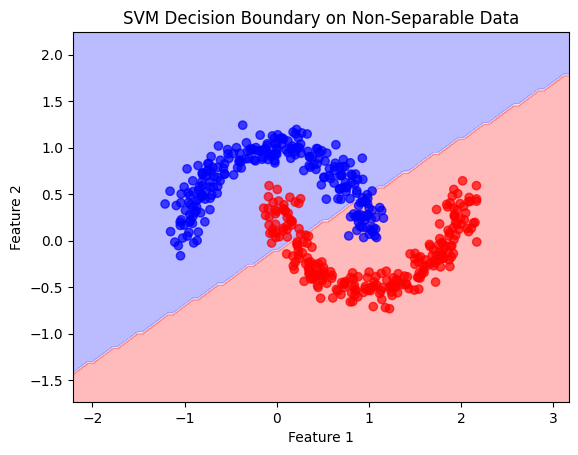

In [5]:
# Generate linearly separable synthetic data first
X, y = make_blobs(n_samples=500, centers=2, random_state=42)
y = np.where(y == 0, -1, 1)  # Convert labels to -1 and 1
# Visualize the data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', alpha=0.7)
plt.title("Linearly Separable Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Train the SVM model
model = SVM(learning_rate=0.01, n_iterations=1000, regularization_param=0.01, silent=False)
model.fit(X_train, y_train)
# Plot loss history
plt.plot(model.loss_history)
plt.title("SVM Training Loss History")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.show()
# Evaluate the model
y_pred = model.predict(X_test)
accuracy = np.mean(y_pred == y_test)
print(f"Test Accuracy on linearly separable data: {accuracy * 100:.2f}%")
# Visualize decision boundary
xx, yy = np.meshgrid(np.linspace(X[:,0].min()-1, X[:,0].max()+1, 100),
                     np.linspace(X[:,1].min()-1, X[:,1].max()+1, 100))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3, cmap='bwr')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', alpha=0.7)
plt.title("SVM Decision Boundary on Linearly Separable Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# Generate non-separable synthetic data
X, y = make_moons(n_samples=500, noise=0.1, random_state=42)
y = np.where(y == 0, -1, 1)  # Convert labels to -1 and 1
# Visualize the data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', alpha=0.7)
plt.title("Non-Separable Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Train the SVM model
model = SVM(learning_rate=0.01, n_iterations=1000, regularization_param=0.01, silent=False)
model.fit(X_train, y_train)
# Plot loss history
plt.plot(model.loss_history)
plt.title("SVM Training Loss History")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.show() 
# Evaluate the model
y_pred = model.predict(X_test)
accuracy = np.mean(y_pred == y_test)
print(f"Test Accuracy on non-separable data: {accuracy * 100:.2f}%")
# Visualize decision boundary
xx, yy = np.meshgrid(np.linspace(X[:,0].min()-1, X[:,0].max()+1, 100),
                     np.linspace(X[:,1].min()-1, X[:,1].max()+1, 100))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3, cmap='bwr')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', alpha=0.7)
plt.title("SVM Decision Boundary on Non-Separable Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

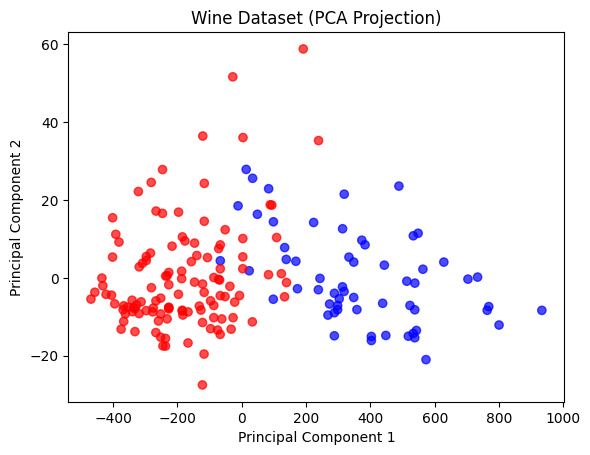

Iteration 0, Loss: 1.0
Iteration 100, Loss: 0.16975538098825327
Iteration 200, Loss: 0.10459993656732283
Iteration 300, Loss: 0.0820362827111269
Iteration 400, Loss: 0.06815538860021884
Converged at iteration 405.


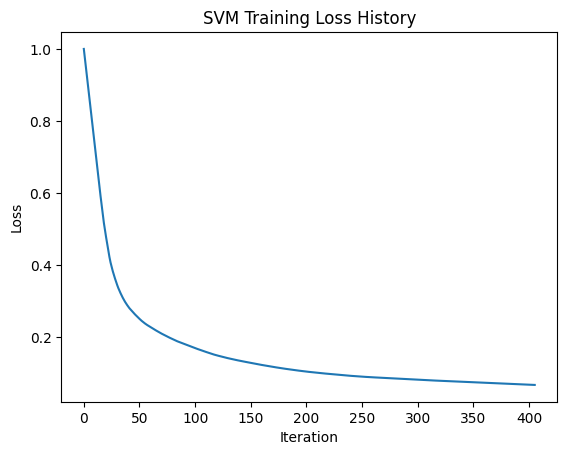

Test Accuracy on Wine dataset: 100.00%


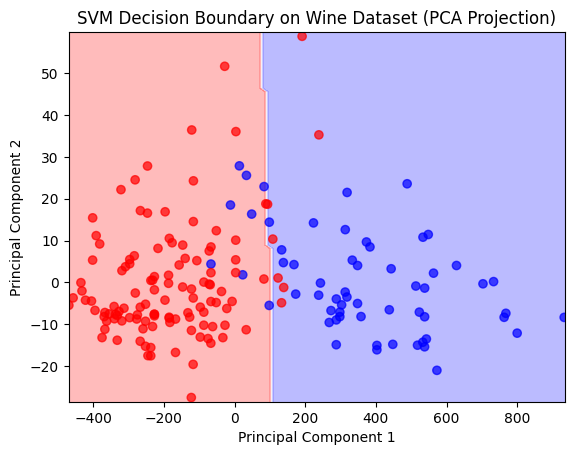

In [6]:
# Now test on the Wine dataset
data = load_wine()
X = data.data
y = data.target
y = np.where(y == 0, -1, 1)  # Convert to binary classification: class 0 vs classes 1 and 2
# Visualize the data (using first two principal components)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='bwr', alpha=0.7)
plt.title("Wine Dataset (PCA Projection)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Normalize features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Train the SVM model
model = SVM(learning_rate=0.01, n_iterations=1000, regularization_param=0.01, silent=False)
model.fit(X_train, y_train)
# Plot loss history
plt.plot(model.loss_history)
plt.title("SVM Training Loss History")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.show()
# Evaluate the model
y_pred = model.predict(X_test)
accuracy = np.mean(y_pred == y_test)
print(f"Test Accuracy on Wine dataset: {accuracy * 100:.2f}%")
# Visualize decision boundary (using PCA projection) on the un-normalized data
xx, yy = np.meshgrid(np.linspace(X_pca[:,0].min()-1, X_pca[:,0].max()+1, 100),
                     np.linspace(X_pca[:,1].min()-1, X_pca[:,1].max()+1, 100))
grid = np.c_[xx.ravel(), yy.ravel()]
grid_original_space = pca.inverse_transform(grid)
Z = model.predict(scaler.transform(grid_original_space))
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3, cmap='bwr')
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='bwr', alpha=0.7)
plt.title("SVM Decision Boundary on Wine Dataset (PCA Projection)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


## Task 3.2.2 - SVM with Kernel Trick

* Extend your SVM implementation to support the kernel trick with the Radial Basis Function (RBF) kernel. Report on the performance on the [Wine Dataset](https://archive.ics.uci.edu/dataset/109/wine) dataset and compare to the linear SVM. **(RESULT)**

In [7]:
class KernelSVM(SVM):
    """
    Support Vector Machine with Kernel Trick implementation for the radial basis function (RBF) kernel.
    """
    
    def __init__(self, gamma=0.5, **kwargs):
        super().__init__(**kwargs)
        self.gamma = gamma
        self.X_train = None
        self.y_train = None
        self.alpha = None  # Dual coefficients
        self.b = None

    def rbf_kernel(self, X1, X2):
        """
        Compute the RBF (Gaussian) kernel between two sets of vectors.
        
        Parameters:
        X1 : np.ndarray
            First set of vectors of shape (n_samples_1, n_features).
        X2 : np.ndarray
            Second set of vectors of shape (n_samples_2, n_features).
        
        Returns:
        np.ndarray
            Kernel matrix of shape (n_samples_1, n_samples_2).
        """
        sq_dists = np.sum(X1**2, axis=1).reshape(-1, 1) + np.sum(X2**2, axis=1) - 2 * X1 @ X2.T
        return np.exp(-self.gamma * sq_dists)
    
    def fit(self, X, y):
        """
        Fit the Kernel SVM model to the training data.
        
        Parameters:
        X : np.ndarray
            Training feature data of shape (n_samples, n_features).
        y : np.ndarray
            Training labels of shape (n_samples,). Labels should be -1 or 1.
        """
        n_samples = X.shape[0]
        self.X_train = X
        self.y_train = y
        self.alpha = np.zeros(n_samples)
        
        K = self.rbf_kernel(X, X)
        
        for iteration in range(self.n_iterations):
            # Transform into the dual problem space
            margins = y * (K @ (self.alpha * y))
            loss = ( np.mean(np.maximum(0, 1 - margins)) + (self.regularization_param / 2) 
                    * np.sum((self.alpha * y) @ K @ (self.alpha * y)) )
            self.loss_history.append(loss)
            
            if not self.silent and iteration % 100 == 0:
                print(f"Iteration {iteration}, Dual Lagrangian: {loss}")
            
            # Compute gradient
            indicator = (margins < 1).astype(float)
            gradient = ( -np.mean((indicator * y)[:, np.newaxis] * K, axis=0) 
                        + self.regularization_param * (K @ (self.alpha * y)) * y )
            
            self.alpha -= self.learning_rate * gradient
            
            if iteration > 0 and abs(self.loss_history[-2] - loss) < self.convergence_tol:
                if not self.silent:
                    print(f"Converged at iteration {iteration}.")
                break

        # Identity the support vectors
        support_vector_indices = np.where(self.alpha > 1e-5)[0]
        if len(support_vector_indices) > 0:
            self.b = np.mean(y[support_vector_indices] - 
                             (K[support_vector_indices] @ (self.alpha * y)))
        else:
            self.b = 0.0

    def predict(self, X):
        """
        Predict labels for the input data.
        
        Parameters:
        X : np.ndarray
            Input feature data of shape (n_samples, n_features).
        
        Returns:
        np.ndarray
            Predicted labels of shape (n_samples,). Labels are -1 or 1.
        """
        K = self.rbf_kernel(X, self.X_train)
        predictions = K @ (self.alpha * self.y_train) + self.b
        return np.where(predictions <= 0, 1, -1)

Iteration 0, Dual Lagrangian: 1.0
Iteration 100, Dual Lagrangian: 5.647693211906474
Iteration 200, Dual Lagrangian: 5.6479812495947535
Iteration 300, Dual Lagrangian: 5.648196006221068
Iteration 400, Dual Lagrangian: 5.648368569618935
Iteration 500, Dual Lagrangian: 5.648503803995617
Iteration 600, Dual Lagrangian: 5.648609994342255
Iteration 700, Dual Lagrangian: 5.648695157090097
Iteration 800, Dual Lagrangian: 5.648765633839385
Iteration 900, Dual Lagrangian: 5.648826045686503


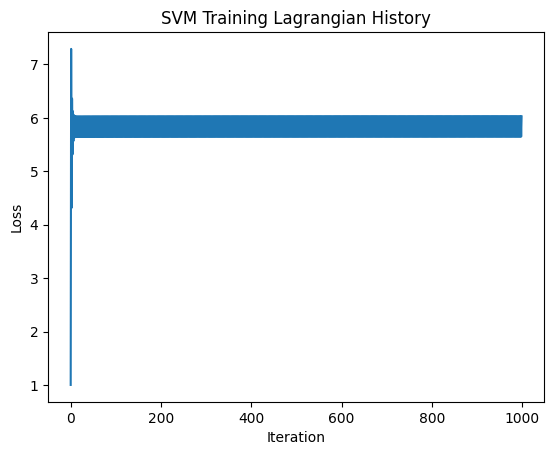

Test Accuracy on linearly separable data: 60.00%


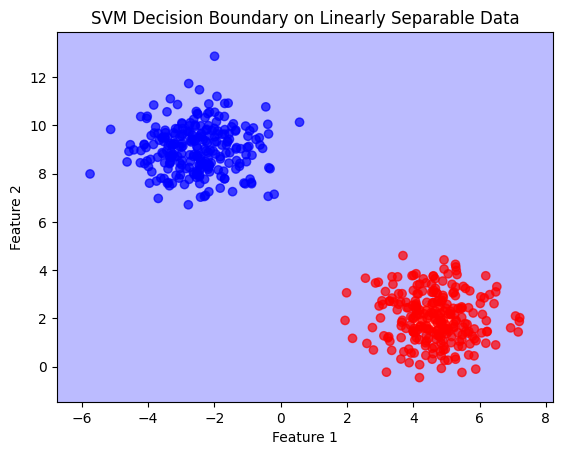

In [8]:
# Try the KernelSVM on the separable dataset
X, y = make_blobs(n_samples=500, centers=2, random_state=42)
y = np.where(y == 0, -1, 1)  # Convert labels to -1 and 1
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Train the SVM model
gamma = 0.1  # RBF kernel parameter
model = KernelSVM(gamma=gamma, learning_rate=0.1, n_iterations=1000, regularization_param=0.1, silent=False)
model.fit(X_train, y_train)
# Plot loss history
plt.plot(model.loss_history)
plt.title("SVM Training Lagrangian History")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.show()
# Evaluate the model
y_pred = model.predict(X_test)
accuracy = np.mean(y_pred == y_test)
print(f"Test Accuracy on linearly separable data: {accuracy * 100:.2f}%")
# Visualize decision boundary
xx, yy = np.meshgrid(np.linspace(X[:,0].min()-1, X[:,0].max()+1, 100),
                     np.linspace(X[:,1].min()-1, X[:,1].max()+1, 100))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3, cmap='bwr')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', alpha=0.7)
plt.title("SVM Decision Boundary on Linearly Separable Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

As we can see, the Gaussian kernel SVM fails on linearly separable data.  We tried tuning the parameters a bit but to no avail.

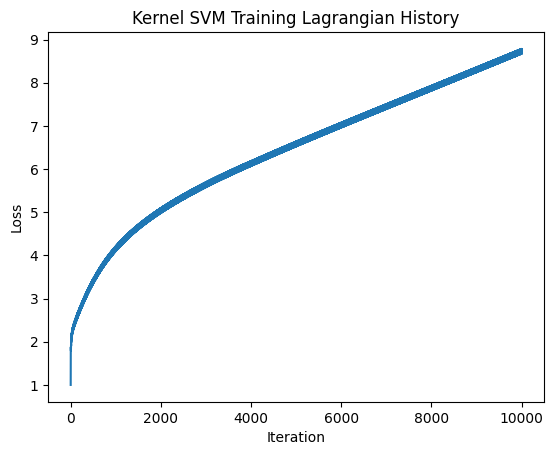

Test Accuracy of Kernel SVM on non-separable data: 96.00%


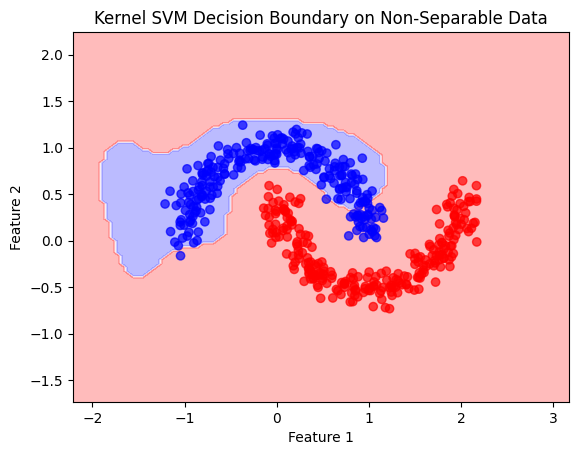

In [9]:
# Try the KernelSVM on the non-separable moons dataset
X, y = make_moons(n_samples=500, noise=0.1, random_state=42)
y = np.where(y == 0, -1, 1)  # Convert labels to -1 and 1
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Train the Kernel SVM model
gamma = 1.65  # RBF kernel parameter
model = KernelSVM(gamma=gamma, learning_rate=0.1, n_iterations=10000, regularization_param=0.1, silent=True)
model.fit(X_train, y_train)
# Plot loss history
plt.plot(model.loss_history)
plt.title("Kernel SVM Training Lagrangian History")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.show()
# Evaluate the model
y_pred = model.predict(X_test)
accuracy = np.mean(y_pred == y_test)
print(f"Test Accuracy of Kernel SVM on non-separable data: {accuracy * 100:.2f}%")
# Visualize decision boundary
xx, yy = np.meshgrid(np.linspace(X[:,0].min()-1, X[:,0].max()+1, 100),
                     np.linspace(X[:,1].min()-1, X[:,1].max()+1, 100))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3, cmap='bwr')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', alpha=0.7)
plt.title("Kernel SVM Decision Boundary on Non-Separable Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

For the half moons, this was the best we could do.  Not perfect but a lot better than with a linear decision boundary!

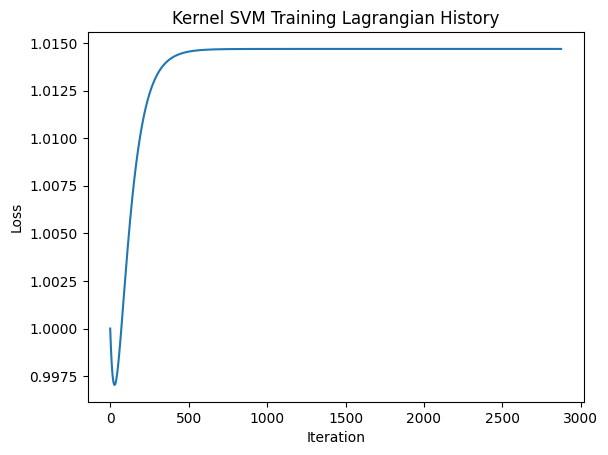

Test Accuracy of Kernel SVM on Wine dataset: 38.89%


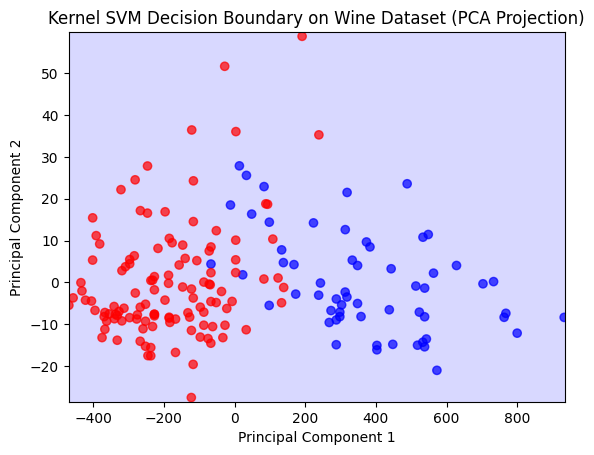

In [10]:
data = load_wine()
X = data.data
y = data.target
y = np.where(y == 0, -1, 1)  # Convert to binary classification: class 0 vs classes 1 and 2
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Normalize features
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Train the Kernel SVM model on the Wine dataset
gamma = 1  # RBF kernel parameter
model = KernelSVM(gamma=gamma, learning_rate=0.1, n_iterations=10000, regularization_param=0.1, silent=True, convergence_tol=1e-20)
model.fit(X_train, y_train)
# Plot loss history
plt.plot(model.loss_history)
plt.title("Kernel SVM Training Lagrangian History")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.show()
# Evaluate the model
y_pred = model.predict(X_test)
accuracy = np.mean(y_pred == y_test)
print(f"Test Accuracy of Kernel SVM on Wine dataset: {accuracy * 100:.2f}%")
# Visualize decision boundary (using PCA projection) on the un-normalized data
X_pca = pca.fit_transform(X)
xx, yy = np.meshgrid(np.linspace(X_pca[:,0].min()-1, X_pca[:,0].max()+1, 100),
                     np.linspace(X_pca[:,1].min()-1, X_pca[:,1].max()+1, 100))
grid = np.c_[xx.ravel(), yy.ravel()]
grid_original_space = pca.inverse_transform(grid)
Z = model.predict(scaler.transform(grid_original_space))
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3, cmap='bwr')
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='bwr', alpha=0.7)
plt.title("Kernel SVM Decision Boundary on Wine Dataset (PCA Projection)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

**Report:**

As we saw playing with the linearly separable synthetic data, the Gaussian Kernel SVM model fails on the wine data.  Recall that we discovered that our wine classification data was basically linearly separable so this comes as no surprise.

## Congratz, you made it! :)